# Random Forest Digit Recognizer

In this notebook, we apply a Random Rorest classifier to identify the digit displayed in an image. We use the Random Forest Classifier from Scikit learn, beginning with the default parameters, before exploring optimal values for the number of trees, the criterion for measuring quality of a split, and the maximum number of features to consider.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble as ens
from sklearn_pandas import DataFrameMapper
%matplotlib inline

In [180]:
training_digits = pd.read_csv('train.csv')


Now that the data is loaded, we can check to see whether all digits are sufficiently represented in the dataset by plotting a histogram:

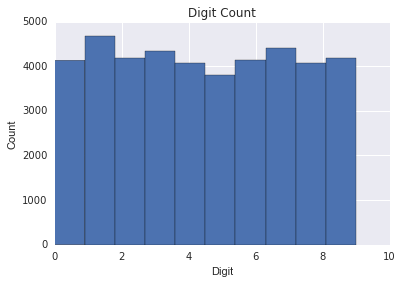

In [181]:
training_digits.hist(column = ['label'])
plt.title('Digit Count')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

Now we create an array of labels and features from the training digits dataset, but we'll only use 3/4 of the data, and reserve the remaining 1/4 for testing our classifier. We compare the histogram of labels for the training and test data to confirm an even distribution of digits in each set.

In [182]:
X = len(training_digits)*3/4
train_data_array = training_digits.values[0:X,:]
labels = train_data_array[:,0]
features = train_data_array[:,1:]
test_data_array = training_digits.values[X:,:]
test_labels = test_data_array[:,0]
test_features = test_data_array[:,1:]

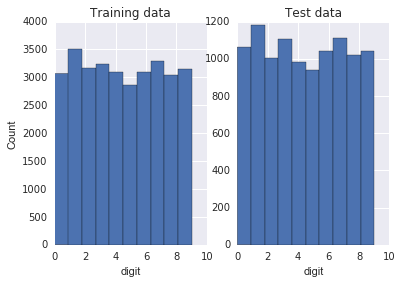

In [183]:
plt.subplot(121)
plt.hist(labels)
plt.title('Training data')
plt.xlabel('digit')
plt.ylabel('Count')
plt.subplot(122)
plt.hist(test_labels)
plt.title('Test data')
plt.xlabel('digit')
plt.show()


Great, it looks like we have a fairly even distribution of digits in each set.

Next, we'll build a Random Forest classifier using the training data.

In [184]:
rf_cl = ens.RandomForestClassifier(n_jobs = -1)
rf_cl = rf_cl.fit(features, labels)

Now we test the classifier using the portion of the training data that we reserved as test data, and compare the known digits to the predicted digits.

In [185]:
actual = test_labels
predicted = rf_cl.predict(test_features)

correct = actual == predicted
num_correct = sum(correct)
frac_correct = float(num_correct)/len(actual)
print 'The classifier got %i right' %num_correct, 'which is equivalent to %0.3f' %frac_correct

The classifier got 9863 right which is equivalent to 0.939


We see that our Random Trees classifier was correct 93% of the time. Let's see whether certain digits were harder to predict than others.

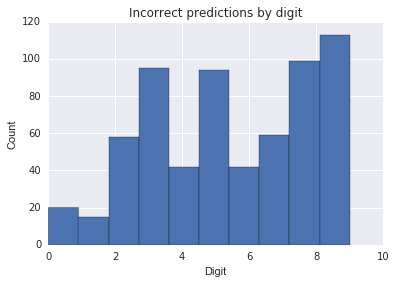

In [187]:
incorrect= test_labels[actual!=predicted]
plt.hist(incorrect)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Incorrect predictions by digit')
plt.show()

This classifier did a pretty good job on 0's and 1's, and struggled the most with 3's, 5's, 8's and 9's. We can also investigate what was being predicted instead of the true response for these trickier digits.

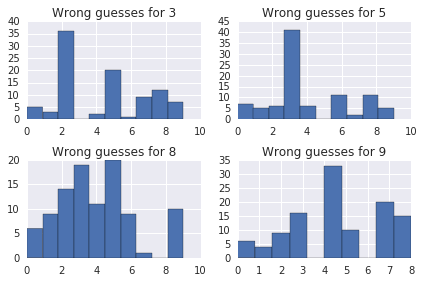

In [188]:
wrong_3 = predicted[(test_labels == 3) & (actual!=predicted)]
wrong_5 = predicted[(test_labels == 5) & (actual!=predicted)]
wrong_8 = predicted[(test_labels == 8) & (actual!=predicted)]
wrong_9 = predicted[(test_labels == 9) & (actual!=predicted)]
plt.subplot(221)
plt.hist(wrong_3)
plt.title('Wrong guesses for 3')
plt.subplot(222)
plt.hist(wrong_5)
plt.title('Wrong guesses for 5')
plt.subplot(223)
plt.hist(wrong_8)
plt.title('Wrong guesses for 8')
plt.subplot(224)
plt.hist(wrong_9)
plt.title('Wrong guesses for 9')
plt.tight_layout()
plt.show()

Before we move on and try another estimator, we can try different parameters for the Random Forest Classifier. While it has many different parameters that we can tweak, we'll focus on the number of estimators, the criterion, and the maximum number of features. 

In the following section, we loop through different numbers of trees in the Random Forest algorithm and compare the accuracy of our predictions.

In [189]:
frac_correct_Nest = []
for Nx in range(5, 200, 20):
    rf_cl_Nest = ens.RandomForestClassifier(n_jobs = -1, n_estimators = Nx)
    rf_cl_Nest = rf_cl_Nest.fit(features, labels)
    predicted_Nest = rf_cl_Nest.predict(test_features)
    NC = sum(actual == predicted_Nest)
    frac_correct_Nest.append(float(NC)/len(actual))

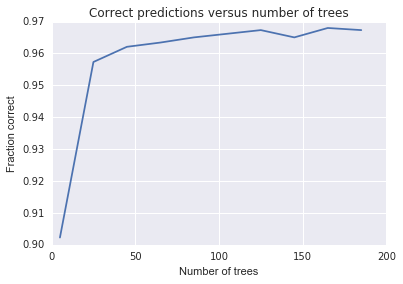

In [190]:
plt.plot(range(5, 200, 20), frac_correct_Nest)
plt.title('Correct predictions versus number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Fraction correct')
plt.show()

We see that the accuracy of our predictor increases significantly as we go from 5 to 25 trees, but we don't see much change as we continue to increase the number of trees above 50. Because it's faster to use fewer trees, we will choose to use 50, as this balances accuracy and speed.

Now let's see what the impact is if we change the criterion for measuring quality of split. The default option is Gini impurity; let's compare the results for the "entropy" option.

In [192]:
frac_correct_ent = []
for Nx in range(5, 200, 20):
    rf_cl_ent = ens.RandomForestClassifier(n_jobs = -1, n_estimators = Nx, criterion = 'entropy')
    rf_cl_ent = rf_cl_ent.fit(features, labels)
    predicted_ent = rf_cl_ent.predict(test_features)
    NC = sum(actual == predicted_ent)
    frac_correct_ent.append(float(NC)/len(actual))

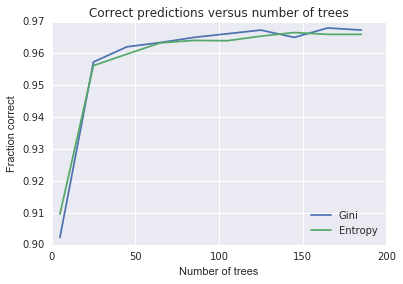

In [193]:
plt.plot(range(5, 200, 20), frac_correct_Nest, label = 'Gini')
plt.plot(range(5, 200, 20), frac_correct_ent, label = 'Entropy')
plt.title('Correct predictions versus number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Fraction correct')
plt.legend(loc = 4)
plt.show()

We see some small differences, but one method does not consistently do a better job. We'll stick to using the default 'Gini' criterion.

The default maximum number of features is the square root of the number of features, but we can allow the algorithm to use as many or as few features as we want. Let's see how the number of features impacts the algorithm's accuracy.

In [204]:
frac_correct_Nfeat = []
N_feat = [5,10,20,50,100,150,200,250]
for Nf in N_feat:
    rf_cl_Nfeat = ens.RandomForestClassifier(n_jobs = -1, n_estimators = 50,  max_features = Nf)
    rf_cl_Nfeat = rf_cl_Nfeat.fit(features, labels)
    predicted_Nfeat = rf_cl_Nfeat.predict(test_features)
    NC = sum(actual == predicted_Nfeat)
    frac_correct_Nfeat.append(float(NC)/len(actual))

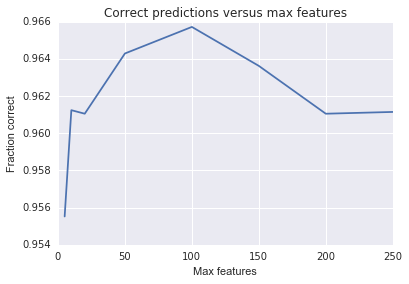

In [205]:
plt.plot(N_feat, frac_correct_Nfeat)
plt.xlabel('Max features')
plt.ylabel('Fraction correct')
plt.title('Correct predictions versus max features')
plt.show()

It looks like our classifier does best with about 100 features, and gets us close to 97% accuracy.

Now, I'm curious whether we saw improvements equally for all digits, or just for some. Let's compare predictions with the new classifier (i.e. using our optimized parameters) to the initial run.

In [207]:
rf_cl_opt = ens.RandomForestClassifier(n_jobs = -1, n_estimators = 50, max_features = 100)
rf_cl_opt = rf_cl_opt.fit(features, labels)

predicted_opt = rf_cl_opt.predict(test_features)
incorrect_opt= test_labels[actual!=predicted_opt]


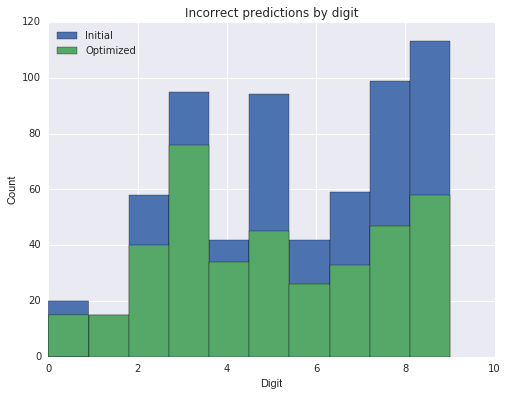

In [215]:
plt.figure(figsize=(8,6))
plt.hist(incorrect)
plt.hist(incorrect_opt)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Incorrect predictions by digit')
plt.legend(['Initial','Optimized'], loc = 'best')
plt.show()

We see significant improvements in our ability to predict the "tricky" numbers, with the biggest change in 5 and the smallest in 3, which our improved classifier still seems to struggle to classify.

Now we're ready to apply our classifier to the test data provided by Kaggle. We'll train our model using the full training dataset, and hope that the optimal parameters we selected hold for the slightly larger dataset.

In [218]:
Test_digits = pd.read_csv('test.csv')
Features = training_digits.values[:,1:]
Labels = training_digits.values[:,0]
RF_CL = ens.RandomForestClassifier(n_jobs = -1, n_estimators = 50, max_features = 100)
RF_CL = RF_CL.fit(Features, Labels)
Predictions = RF_CL.predict(Test_digits)

The last thing to do is to create a file with our submission, including the image ID and the predicted label.

In [233]:
N = range(1,2801)
submission = open('submission.csv','w')
submission.write('ImageId,Label\n')
for n in N:
    submission.write('%i, %i \n' %(n,Predictions[n]))

submission.close()